Written by Guanyu Lin - guanyul@kth.se, and Tawsiful Islam - tawsiful@kth.se

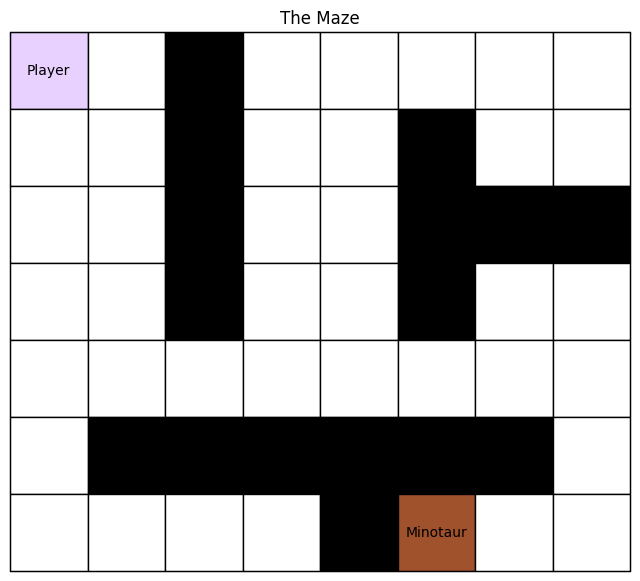

In [1]:
import numpy as np
import problem1 as mz
import matplotlib.pyplot as plt
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
mz.draw_maze(maze_mat, start_pos, minotaur_pos)

## Code for task (C)

[((0, 0), (6, 5)), ((0, 1), (6, 6)), ((1, 1), (6, 5)), ((2, 1), (6, 4)), ((3, 1), (6, 5)), ((4, 1), (6, 6)), ((4, 2), (6, 7)), ((4, 3), (5, 7)), ((4, 4), (6, 7)), ((4, 5), (6, 6)), ((4, 6), (5, 6)), ((4, 7), (5, 5)), ((5, 7), (6, 5)), ((6, 7), (6, 6)), ((6, 6), (5, 6)), ((6, 5), (5, 7)), ((6, 5), (4, 7)), ((6, 5), (3, 7)), ((6, 5), (3, 6)), ((6, 5), (4, 6)), ((6, 5), (5, 6))]


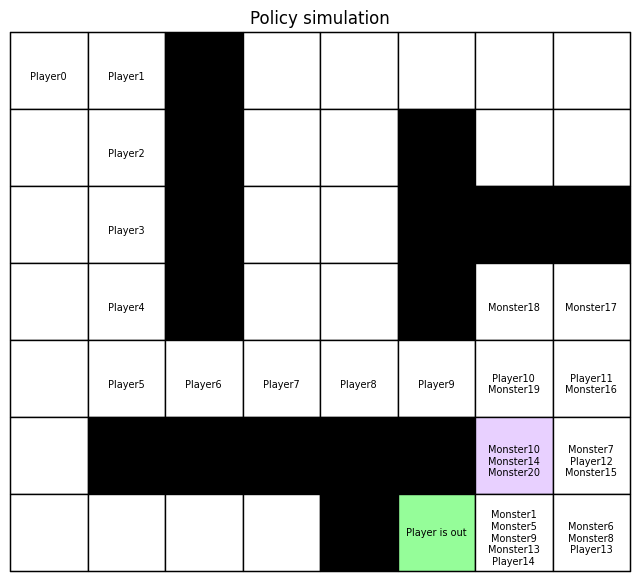

In [2]:
# Create an environment maze
env = mz.Maze(maze_mat,None,False,False)
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)
method = 'DynProg'
start  = ((0, 0),( 6, 5))
path = env.simulate(start, policy, method)
mz.animate_solution(maze_mat, path)
print(path)

## Code for task (D)

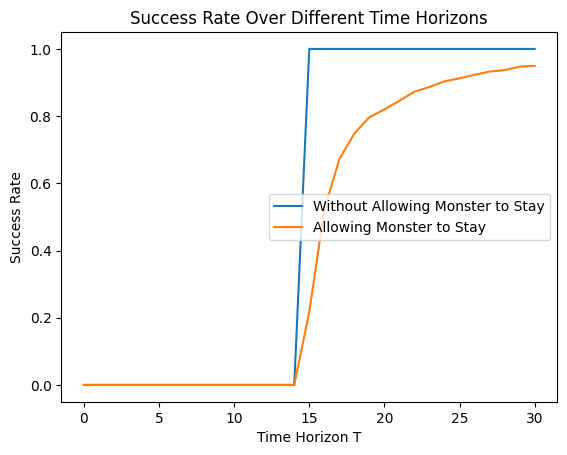

In [3]:
# Not allow monster to stay
n = 10000
ps = []
for t in range(31):
    V, policy= mz.dynamic_programming(env,t)
    success = 0
    method = 'DynProg'
    start  = ((0, 0),(6, 5))
    for _ in range(n):
        path = env.simulate(start, policy, method);
        if path[-1][0] == (6, 5):
            success += 1
    ps.append(success/n)

plt.plot(ps, label="Without Allowing Monster to Stay")

# Allow monster to stay
enva = mz.Maze(maze_mat)
psa = []
for t in range(31):
    V, policy= mz.dynamic_programming(enva,t)
    success = 0
    method = 'DynProg'
    start  = ((0, 0),(6, 5))
    for _ in range(n):
        path = enva.simulate(start, policy, method);
        if path[-1][0] == (6, 5):
            success += 1
    psa.append(success/n)
plt.plot(psa, label="Allowing Monster to Stay")
plt.legend()
plt.title("Success Rate Over Different Time Horizons")
plt.xlabel("Time Horizon T")
plt.ylabel("Success Rate")
plt.show()

## Code for task (e) and (f)

In [5]:
env_VI = mz.Maze(maze_mat,None,False,False)
n = 10000
success = 0
v, policy = mz.value_iteration(env_VI, 29/30, 0.001)
start  = ((0, 0),(6, 5))
#path = env.simulate(start, policy, method)
#mz.animate_solution(maze_mat, path)
for _ in range(n):
    path = env_VI.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5):
        success += 1
print("The survice rate is: "+str(100*success/n)+"%")

The survice rate is: 61.95%


## Code for Bonus task (i) Q-learning

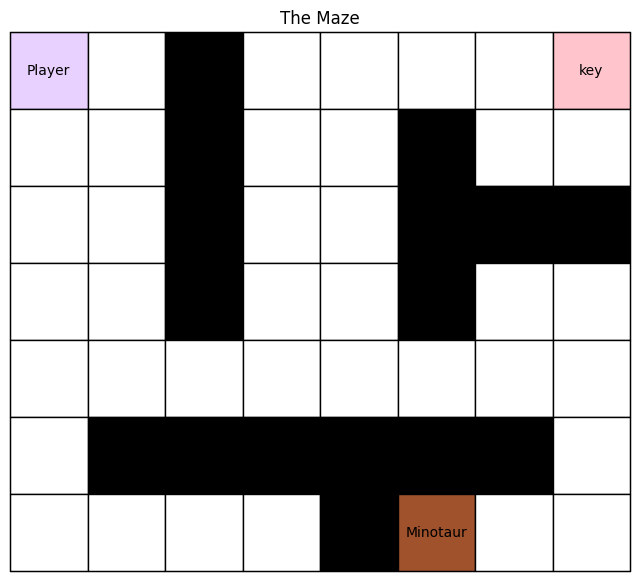

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
import copy
from tqdm import tqdm
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
mz_b.draw_maze(maze_mat, start_pos, minotaur_pos,key_pos)

## (i) 2)

In [7]:
# Q-learning
seed = 123
env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 200
alpha = 2/3
gamma = 49/50
init_list = ["zero","nonzero"]
epsilon_list = [0.1,0.5]
start  = ((0, 0),(6, 5),0)
value_mat = []
Q_zero = np.zeros((n_states, n_actions))
np.random.seed(seed) 
Q_nonzero = -np.random.uniform(0, 2, (n_states, n_actions))
for s in range(n_states):
    if env.states[s][0] == env.states[s][1] or (env.maze[env.states[s][0]]==2 and env.states[s][2] == 1):
        Q_nonzero[s,:]=np.zeros(n_actions)
        
# Q-learning for different epsilon with different initialisation
for method in init_list:
    for epsilon in epsilon_list:
        np.random.seed(seed) 
        if method == "zero":
            Q_init = copy.deepcopy(Q_zero)
        else:
            Q_init = copy.deepcopy(Q_nonzero)
        
        env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
        print("Running epsilon "+str(epsilon)+" with "+str(method)+" method")
        Q, policy, value_list = mz_b.Q_learning(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon)
        value_mat.append(value_list)
        print("Simulation done")
# method = 'ValIter'
# path = env.simulate(start, policy, method)
# Show the shortest path 
# print(path)
# mz_b.animate_solution(maze_mat, path)

Running epsilon 0.1 with zero method


Training: 100%|██████████| 50000/50000 [00:25<00:00, 1937.64episode/s]


Simulation done
Running epsilon 0.5 with zero method


Training: 100%|██████████| 50000/50000 [00:50<00:00, 992.16episode/s] 


Simulation done
Running epsilon 0.1 with nonzero method


Training: 100%|██████████| 50000/50000 [00:23<00:00, 2118.98episode/s]


Simulation done
Running epsilon 0.5 with nonzero method


Training: 100%|██████████| 50000/50000 [00:47<00:00, 1059.49episode/s]

Simulation done


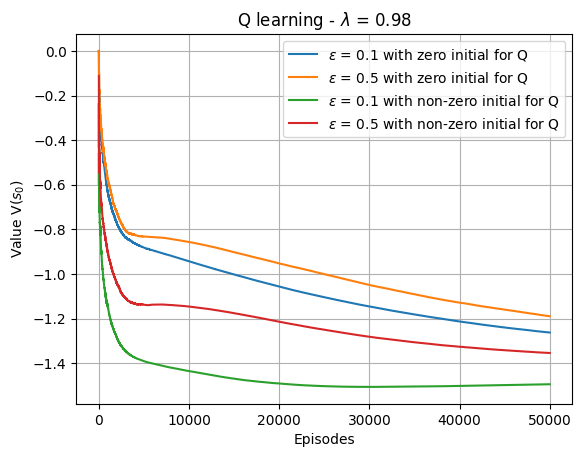

In [8]:
#Plotting Q-learning different alpha values
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.plot(value_mat[2])
plt.plot(value_mat[3])
plt.ylabel('Value V($s_0$)')
plt.xlabel('Episodes')
plt.title('Q learning - $\lambda$ = '+str(gamma))
plt.legend(['$\epsilon$ = '+str(epsilon_list[0])+' with zero initial for Q', '$\epsilon$ = '+str(epsilon_list[1])+' with zero initial for Q',
            '$\epsilon$ = '+str(epsilon_list[0])+' with non-zero initial for Q', '$\epsilon$ = '+str(epsilon_list[1])+' with non-zero initial for Q'])
plt.grid(visible=True)
plt.show()

## (I) 3)

In [9]:
# Q-learning alpha
env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 200
gamma = 49/50
epsilon = 0.1
alpha_list = [2/3,4/5]
start  = ((0, 0),(6, 5),0)
value_mat = []
Q_zero = np.zeros((n_states, n_actions))
# Q-learning for differnet alpha with zero initialisation
for alpha in alpha_list:
    np.random.seed(1)     
    env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
    print("Running alpha "+str(alpha))
    Q, policy, value_list = mz_b.Q_learning(env,copy.deepcopy(Q_zero),start,no_episodes,t_horizon,alpha,gamma,epsilon)
    value_mat.append(value_list)
    print("Simulation done")

Running alpha 0.6666666666666666


Training: 100%|██████████| 50000/50000 [00:26<00:00, 1914.93episode/s]


Simulation done
Running alpha 0.8


Training: 100%|██████████| 50000/50000 [00:28<00:00, 1772.61episode/s]

Simulation done


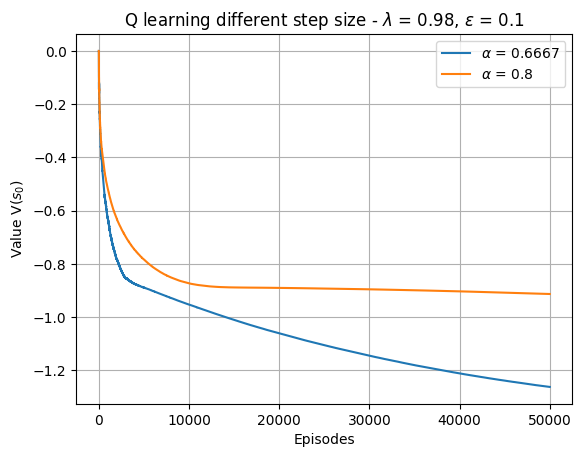

In [10]:
#Plotting Q-learning different alpha values
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.ylabel('Value V($s_0$)')
plt.xlabel('Episodes')
plt.title('Q learning different step size - $\lambda$ = '+str(gamma) +', $\epsilon$ = '+str(epsilon))
plt.legend([r'$\alpha$ = '+str(np.round(alpha_list[0], decimals= 4)), r'$\alpha$ = '+str(alpha_list[1])])
plt.grid(visible=True)
plt.show()

## Code for task (J) SARSA

## J 2)

In [11]:
# SARSA
seed = 123
env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 200
alpha = 2/3
gamma = 49/50
init_list = ["zero","nonzero"]
epsilon_list = [0.1,0.5]
start  = ((0, 0),(6, 5),0)
value_mat = []
Q_zero = np.zeros((n_states, n_actions))
np.random.seed(seed) 
Q_nonzero = -np.random.uniform(0, 2, (n_states, n_actions))
for s in range(n_states):
    if env.states[s][0] == env.states[s][1] or (env.maze[env.states[s][0]]==2 and env.states[s][2] == 1):
        Q_nonzero[s,:]=np.zeros(n_actions)
        
# SARSA for different epsilon with different initialisation
for method in init_list:
    for epsilon in epsilon_list:
        np.random.seed(seed) 
        if method == "zero":
            Q_init = copy.deepcopy(Q_zero)
        else:
            Q_init = copy.deepcopy(Q_nonzero)
        
        env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
        print("Running epsilon "+str(epsilon)+" with "+str(method)+" method")
        Q, policy, value_list = mz_b.SARSA(env,copy.deepcopy(Q_init),start,no_episodes,t_horizon,alpha,gamma,epsilon)
        value_mat.append(value_list)
        print("Simulation done")
# method = 'ValIter'
# path = env.simulate(start, policy, method)
# Show the shortest path 
# print(path)
# mz_b.animate_solution(maze_mat, path)

Running epsilon 0.1 with zero method


Training: 100%|██████████| 50000/50000 [00:25<00:00, 1976.84episode/s]


Simulation done
Running epsilon 0.5 with zero method


Training: 100%|██████████| 50000/50000 [01:06<00:00, 751.82episode/s]


Simulation done
Running epsilon 0.1 with nonzero method


Training: 100%|██████████| 50000/50000 [00:22<00:00, 2251.66episode/s]


Simulation done
Running epsilon 0.5 with nonzero method


Training: 100%|██████████| 50000/50000 [01:01<00:00, 809.54episode/s]

Simulation done


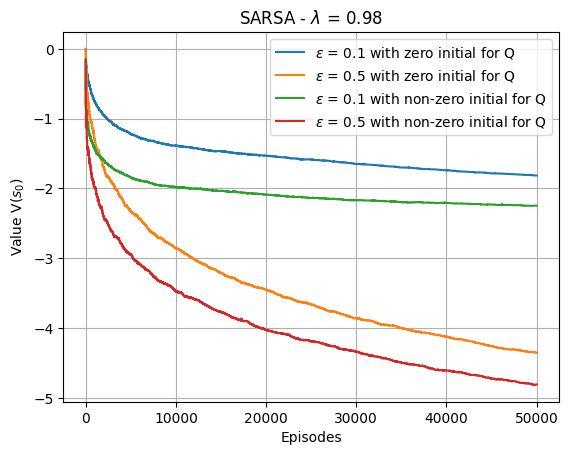

In [12]:
#Plotting SARSA different epsilon
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.plot(value_mat[2])
plt.plot(value_mat[3])
plt.ylabel('Value V($s_0$)')
plt.xlabel('Episodes')
plt.title('SARSA - $\lambda$ = '+str(gamma))
plt.legend(['$\epsilon$ = '+str(epsilon_list[0])+' with zero initial for Q', '$\epsilon$ = '+str(epsilon_list[1])+' with zero initial for Q',
            '$\epsilon$ = '+str(epsilon_list[0])+' with non-zero initial for Q', '$\epsilon$ = '+str(epsilon_list[1])+' with non-zero initial for Q'])
plt.grid(visible=True)
plt.show()

## (J)3)

In [13]:
#SARSA with decay
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
env= mz_b.Maze_bonus(maze_mat,None,False,False,False)
n_states  = env.n_states
n_actions = env.n_actions
no_episodes = 50000
t_horizon = 200
alpha = 2/3
gamma = 49/50
delta_list = [0.6,0.8]
start  = ((0, 0),(6, 5),0)
value_mat = []
Q_init = np.zeros((n_states, n_actions))

# SARSA with decaying exploration
for delta in delta_list:
    np.random.seed(seed)     
    env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
    print("Running delta "+str(delta))
    Q, policy, value_list = mz_b.SARSA_with_decay(env,copy.deepcopy(Q_init),start,no_episodes,t_horizon,alpha,gamma,delta)
    value_mat.append(value_list)
    print("Simulation done")
    # success = 0
    # for _ in range(n):
    #     path = env.simulate(start, policy, 'ValIter')
    #     if path[-1][0] == (6, 5) and path[-1][2]==1:
    #         success += 1
    # probability_list.append(success/n)
    # print("The survival rate is: "+str(100*success/n)+"%")

Running delta 0.6


Training: 100%|██████████| 50000/50000 [00:20<00:00, 2497.52episode/s]


Simulation done
Running delta 0.8


Training: 100%|██████████| 50000/50000 [00:19<00:00, 2509.91episode/s]

Simulation done


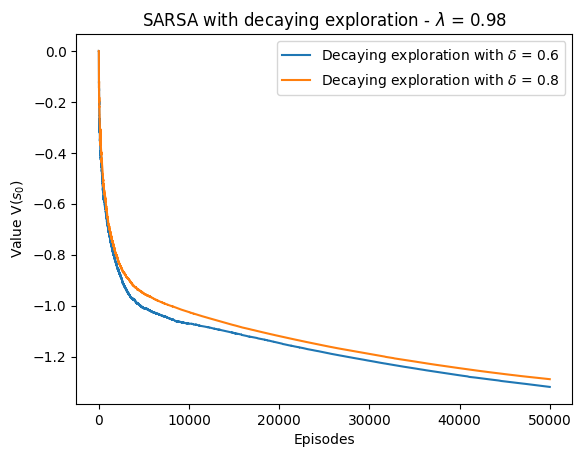

In [14]:
# Plotting SARSA with decaying exploration
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.ylabel('Value V($s_0$)')
plt.xlabel('Episodes')
plt.title('SARSA with decaying exploration - $\lambda$ = '+str(gamma))
plt.legend(['Decaying exploration with $\delta$ = '+str(delta_list[0]), 'Decaying exploration with $\delta$ = '+str(delta_list[1])])
plt.show()

## Task (K) the probability of leaving the maze

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
import copy
from tqdm import tqdm

maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])

env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
seed = 123
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
n = 10000 # No of simulations
t_horizon = 300
gamma = 49/50
epsilon = 0.1
alpha = 2/3
delta = 0.8
start  = ((0, 0),(6, 5),0)
value_mat = []

np.random.seed(seed)  
Q_nonzero = -np.random.uniform(0, 2, (n_states, n_actions))
for s in range(n_states):
    if env.states[s][0] == env.states[s][1] or (env.maze[env.states[s][0]]==2 and env.states[s][2] == 1):
        Q_nonzero[s,:]=np.zeros(n_actions)

# Q-learning
np.random.seed(seed)     
env_Q = mz_b.Maze_bonus(maze_mat,None,False,False,True)
print("Running Q-learning")
Q, policy, value_list = mz_b.Q_learning(env_Q,copy.deepcopy(Q_nonzero),start,no_episodes,t_horizon,alpha,gamma,epsilon)
value_mat.append(value_list)
print("Simulation done")

print("Calculating survival rate over "+str(n)+' simulations for Q-learning')
success = 0
succ_Q_list = []
for sim in tqdm(range(1,n+1), desc="Simulating", unit="simulations"):
    path = env_Q.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
        succ_Q_list.append([sim,success/sim])
print("The survival rate with Q-learning is: "+str(100*success/n)+"%")

################################################################################################

#SARSA with decay
np.random.seed(seed)     
env_S = mz_b.Maze_bonus(maze_mat,None,False,False,True)
print("Running SARSA")
Q, policy, value_list = mz_b.SARSA_with_decay(env_S,copy.deepcopy(Q_nonzero),start,no_episodes,t_horizon,alpha,gamma,delta)
value_mat.append(value_list)
print("Simulation done")

print("Calculating survival rate over "+str(n)+' simulations for SARSA')
success = 0
succ_SARSA_list = []
for sim in tqdm(range(1,n+1), desc="Simulating", unit="simulations"):
    path = env_S.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
        succ_SARSA_list.append([sim,success/sim])
print("The survival rate with SARSA is: "+str(100*success/n)+"%")


Running Q-learning


Training: 100%|██████████| 50000/50000 [00:24<00:00, 2054.27episode/s]


Simulation done
Calculating survival rate over 10000 simulations for Q-learning


Simulating: 100%|██████████| 10000/10000 [00:00<00:00, 11485.30simulations/s]


The survival rate with Q-learning is: 34.89%
Running SARSA


Training: 100%|██████████| 50000/50000 [00:24<00:00, 2076.43episode/s]


Simulation done
Calculating survival rate over 10000 simulations for SARSA


Simulating: 100%|██████████| 10000/10000 [00:00<00:00, 10377.77simulations/s]

The survival rate with SARSA is: 25.78%


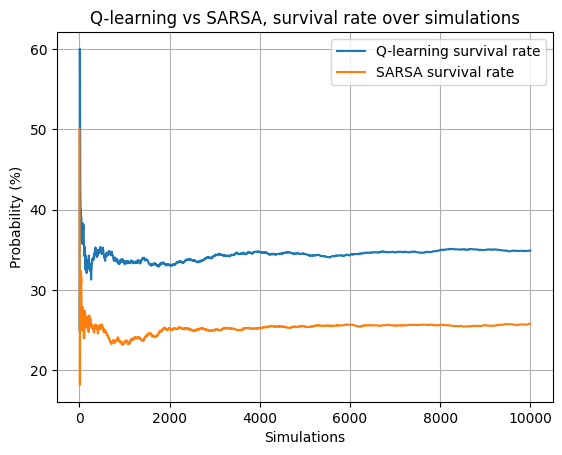

In [16]:
Q_prob_vec = np.array(succ_Q_list)
S_prob_vec = np.array(succ_SARSA_list)
plt.plot(Q_prob_vec[:,0],100*Q_prob_vec[:,1])
plt.plot(S_prob_vec[:,0], 100*S_prob_vec[:,1])
plt.ylabel('Probability (%)')
plt.xlabel('Simulations')
plt.title('Q-learning vs SARSA, survival rate over simulations')
plt.legend(['Q-learning survival rate', 'SARSA survival rate'])
plt.grid(visible=True)
plt.show()